# Plotting functions for behavioural clustering

## Import libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd
import plotly.express as px
import sys
import pickle as pkl

In [2]:
%cd /Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/

bgm_on_pca_nobmi = pkl.load(open('processed_data/bgm_on_pca_nobmi.mdl', 'rb'))
components_nobmi = np.load('processed_data/components_nobmi.npy')
data_num = pd.read_csv('processed_data/behavioural_numerical_data.csv')

/Users/artemii/obrain_lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


## Colour scheme

In [3]:
color_list_subtle = ['steelblue',
                     'wheat',
                     'coral']

color_list_detailed = ['darkblue',
                       'skyblue',
                       'darkorange',
                       'orangered']

color_list_very_detailed = ['darkblue',
                            'skyblue',
                            'olivedrab',
                            'gold',
                            'orangered']

cmap_subtle = colors.LinearSegmentedColormap.from_list('juselius22_subtle', color_list_subtle)
cmap_detailed = colors.LinearSegmentedColormap.from_list('juselius22_detailed', color_list_detailed)
cmap_very_detailed = colors.LinearSegmentedColormap.from_list('juselius22_very_detailed', color_list_very_detailed)

## Fonts

In [4]:
from matplotlib.font_manager import FontProperties, FontManager
# ?
# mgr = FontManager()
# mgr.get_font_names()

In [5]:
font = FontProperties()
font.set_name('Helvetica')

### Show default rcParams

In [6]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

## Plotting

### Scatter

In [7]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

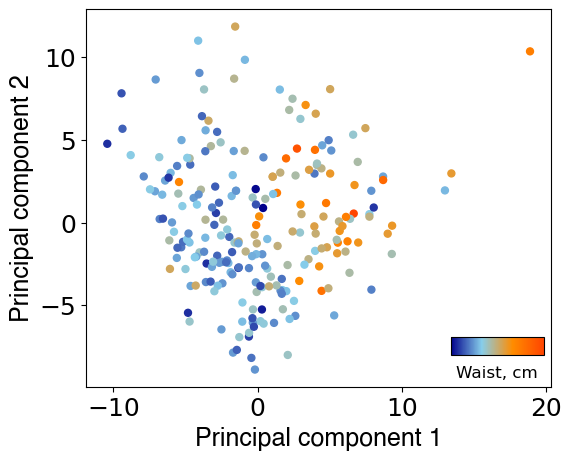

In [8]:
fig, ax = plt.subplots(figsize=[6, 7])

cmap = cmap_detailed

scatter = ax.scatter(components_nobmi[:,0], components_nobmi[:,1],
                     c=data_num['Waist_cm'], alpha=1, s=25, cmap=cmap,
                     #norm=colors.LogNorm(
                     #    vmin=data_num['Waist_cm'].min(), vmax=data_num['Waist_cm'].max()
                     #)
                    )

ax.grid(False)
ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
ax.tick_params(labelsize=18)

colorbar = fig.colorbar(scatter, ticks=[],
                        location='bottom',
                        anchor=(0.98, 3.1),
                        shrink=0.2, aspect=5)

colorbar.set_label('Waist, cm', loc='center', size=12)

plt.savefig('plots/behavioural_pca_cmap_detailed.svg')
plt.show()

### Clustering

#### Plotting functions

In [25]:
# Tweaking the code from the book to adjust the style

from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
        
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=60, linewidths=8,
                color=circle_color, zorder=10, alpha=0.5)
    x = 0
    y = 0
    centroids_text = centroids.copy() - 0.5
    for marker in [0, 3, 8, 1]:
        plt.text(centroids_text[x, 0], centroids_text[y, 1],
                 str(marker), fontsize=20,
                 color=cross_color,
                 zorder=11, alpha=1)
        x += 1
        y += 1

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #plt.contourf(xx, yy, Z,
    #             norm=LogNorm(vmin=1.0, vmax=30.0),
    #             levels=np.logspace(0, 2, 12))
    #plt.contour(xx, yy, Z,
    #            norm=LogNorm(vmin=1.0, vmax=30.0),
    #            levels=np.logspace(0, 2, 12),
    #            linewidths=1, colors='k')
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=[6, 7])
    ax.contour(xx, yy, Z,
               linewidths=1, colors='black', linestyles='dashed')
    
    ax.scatter(X[:, 0], X[:, 1],
               c=data_num['Waist_cm'],
               alpha=1, s=25, cmap=cmap
              )
    plot_centroids(clusterer.means_, clusterer.weights_)

    ax.set_xlabel('Principal component 1', fontproperties=font, fontsize=18)
    if show_ylabels:
        ax.set_ylabel('Principal component 2', fontproperties=font, fontsize=18)
    else:
        ax.tick_params(labelleft=False)
    ax.tick_params(labelsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    colorbar = fig.colorbar(scatter, ticks=[],
                            location='bottom',
                            anchor=(0.97, 3.25),
                            shrink=0.2, aspect=5)
    colorbar.set_label('Waist, cm', loc='center', size=12)
    plt.savefig('plots/behavioural_clusters_cmap_detailed.svg')

#### Plot clustering

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_4741/584742842.py:60: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  colorbar = fig.colorbar(scatter, ticks=[],


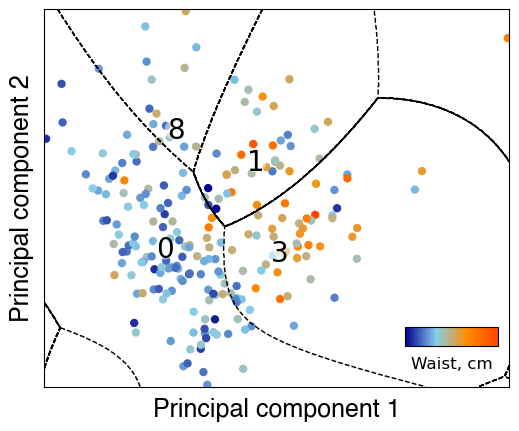

In [26]:
cmap = cmap_detailed
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 2, 0, 7, 1
plt.show()


In [16]:
type(bgm_on_pca_nobmi.means_)

numpy.ndarray

In [18]:
print(bgm_on_pca_nobmi.means_ - 1)

[[-3.90266833 -2.27936857]
 [ 3.36780492 -2.50741463]
 [-0.99672258 -0.99985109]
 [-3.25032959  4.29481947]
 [-0.99672344 -0.99985112]
 [-0.99662942 -0.99985522]
 [-0.99672431 -0.99985116]
 [ 7.54031354  3.5898971 ]
 [ 1.82241083  2.52178378]
 [-0.9967256  -0.99985122]]
